In [2]:
import torch
import matplotlib.pyplot as plt
from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))


In [3]:
original = torch.load('data/dataset_distlognorm_massnorm.pt')
transform = transforms.Resize((29, 10))

### all models are trained with 200 eocihs, T = 1000 and linear scheduler

# interpolation = NEAREST

MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 210570
perc of occurences where mass is not preserved = 35.75% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 114752
perc of occurences where mass is not preserved = 19.48% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 9358
perc of occurences where mass is not preserved = 1.59% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 743
perc of occurences where mass is not preserved = 0.13% vs. 0.32% in training data







DISTANCE:
total distance progentors = 345195 
number of occurences where distance increase (not preserved) = 168162
perc of occurences where mass increase (not preserved) = 48.72% vs. 49.67% in training data


total branches where the last halo distance to mai

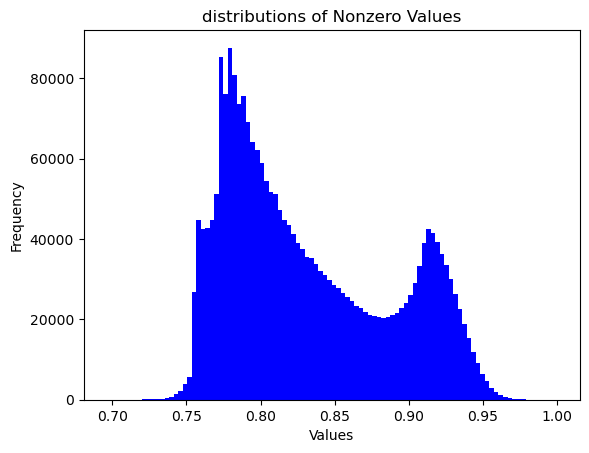

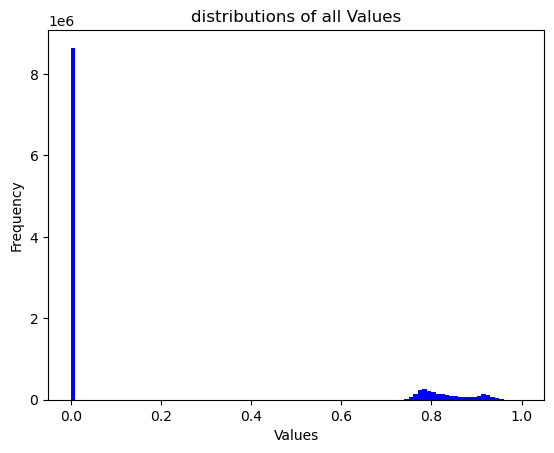

number of nonzero values = 2475374
Generated images:


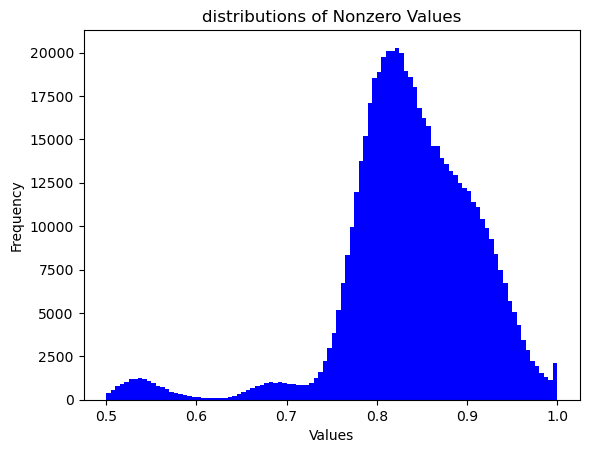

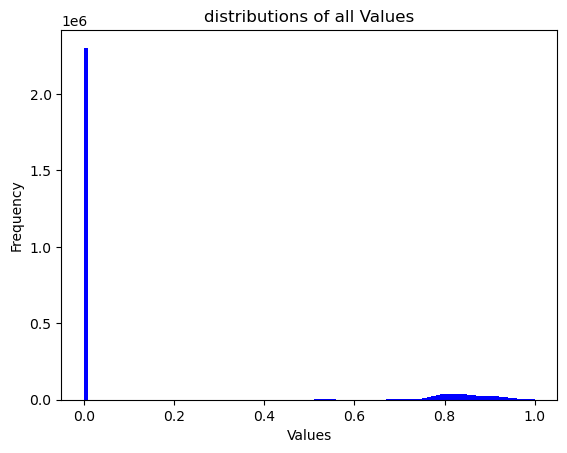

number of nonzero values = 597165


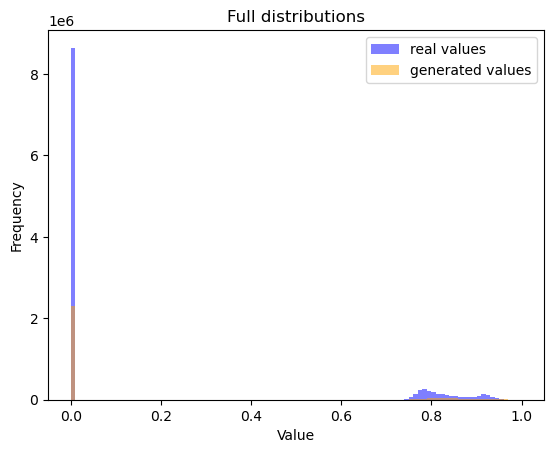

Full distribution:
KS Statistic: 0.029301543829107768
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0293 > 0.0009


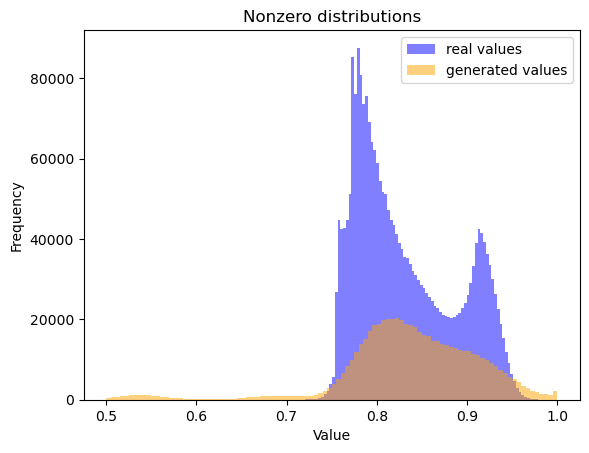

Nonzero distribution:
KS Statistic: 0.14647314764327612
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0020:
The distributions are significantly different (reject H0), KS statistic 0.1465 > 0.0020


(0.029301543829107768, 0.14647314764327612)

In [49]:
nearest = torch.load("../testing/interpolation/generated_image__NEAREST_T=1000_linear.pt", map_location = "cpu")
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])
nearest = transform_diffusion_image(nearest, d_thresh = 0.3, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)

variable_consistancy_check(nearest, False)
avg_branch = check_branch_length(nearest)
nearest_con, nearest_incon = check_consistency(nearest)
ks_test(original, nearest, dim = 1)

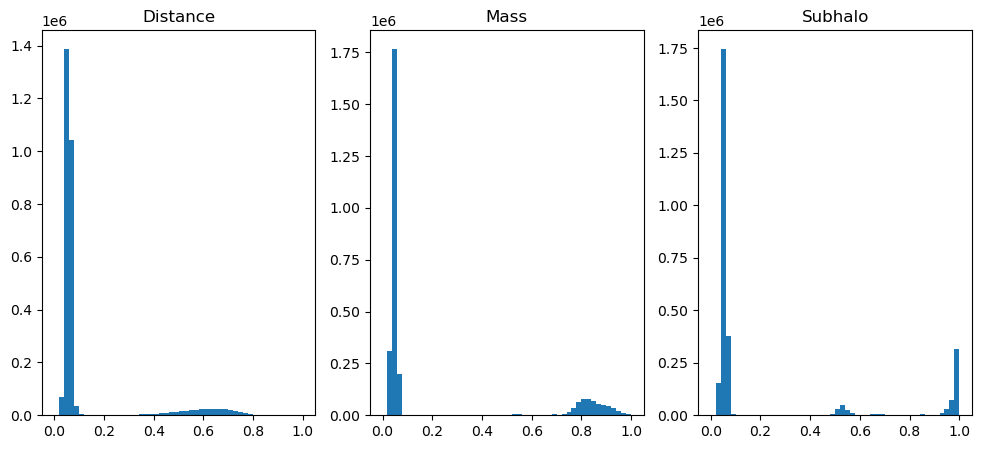

In [50]:
nearest = torch.load("../testing/interpolation/generated_image__NEAREST_T=1000_linear.pt", map_location = "cpu")
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])

dist = nearest[:, 0]
mass = nearest[:, 1]
subh = nearest[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [51]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.4
upper_threshold = 0.5
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.25
upper_threshold = 0.35
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.75
upper_threshold = 0.80
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.3: 0.22%

mass:
Percentage of values between 0.4 and 0.5: 0.02%

subh:
Percentage of values between 0.25 and 0.35: 0.05%

Percentage of values between 0.75 and 0.8: 0.01%



In [52]:
nearest = torch.load("../testing/T/generated_image__NEAREST_T=1000_linear.pt", map_location = "cpu")
nearest = transform(nearest.to(dtype=torch.float))
nearest = normalize(nearest, True, [0, 1, 2])
nearest = transform_diffusion_image(nearest, d_thresh = 0.25, m_tresh = 0.45, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = nearest[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 0.84%



MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 210570
perc of occurences where mass is not preserved = 35.71% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 114752
perc of occurences where mass is not preserved = 19.46% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 9358
perc of occurences where mass is not preserved = 1.59% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 743
perc of occurences where mass is not preserved = 0.13% vs. 0.32% in training data







DISTANCE:
total distance progentors = 347818 
number of occurences where distance increase (not preserved) = 169396
perc of occurences where mass increase (not preserved) = 48.70% vs. 49.67% in training data


total branches where the last halo distance to mai

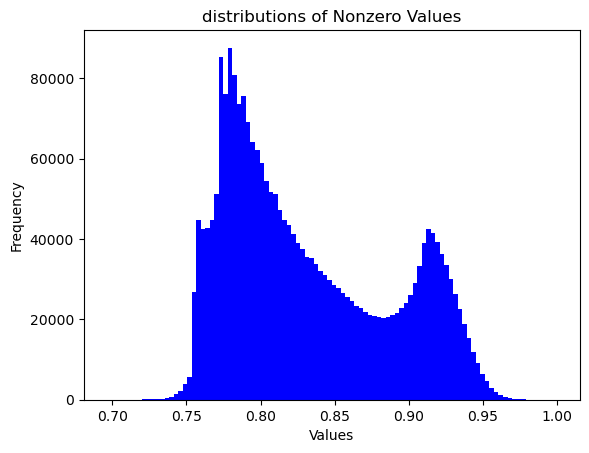

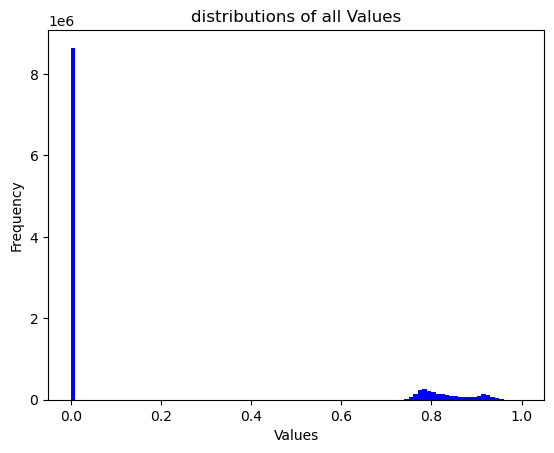

number of nonzero values = 2475374
Generated images:


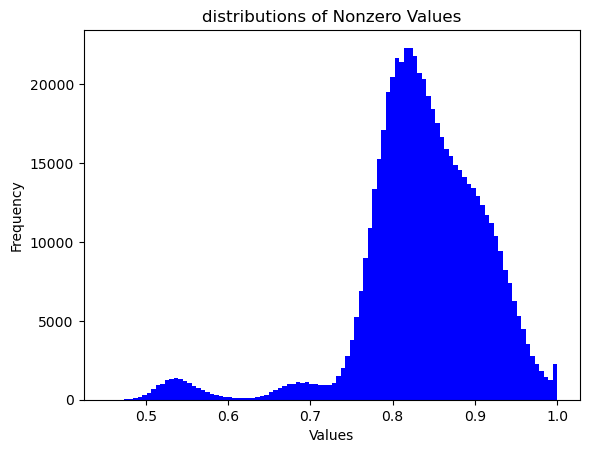

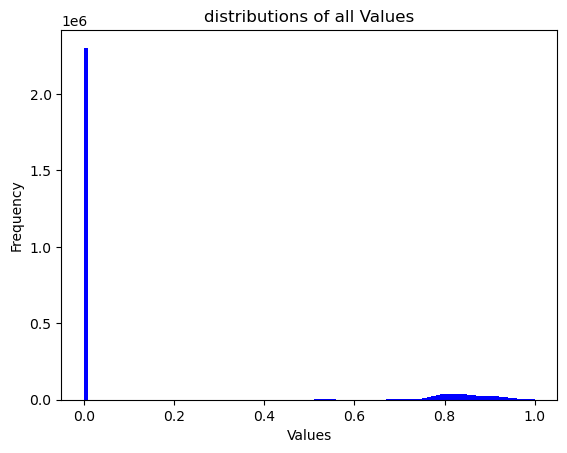

number of nonzero values = 597771


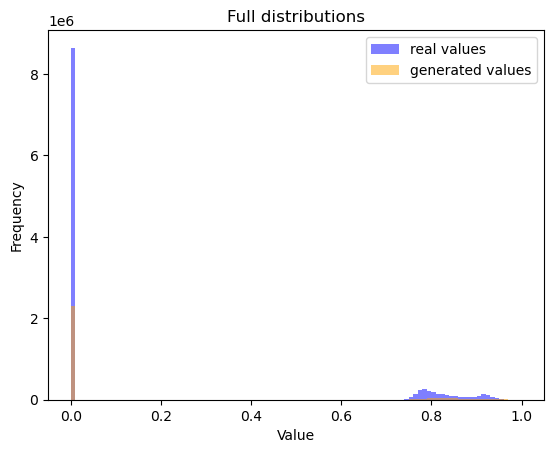

Full distribution:
KS Statistic: 0.029301543829107768
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0293 > 0.0009


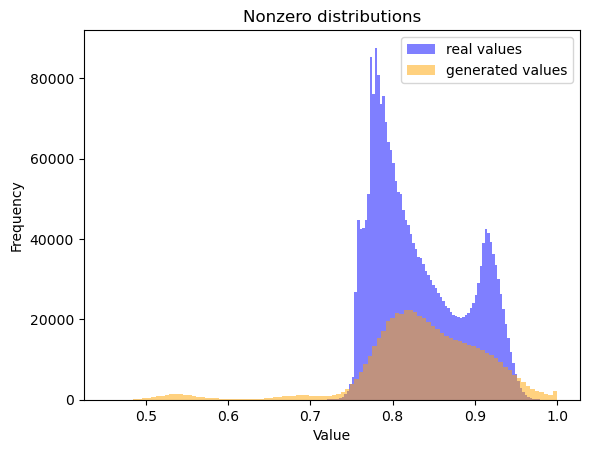

Nonzero distribution:
KS Statistic: 0.14577839363135991
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0020:
The distributions are significantly different (reject H0), KS statistic 0.1458 > 0.0020


(0.029301543829107768, 0.14577839363135991)

In [53]:
variable_consistancy_check(nearest, False)
avg_branch = check_branch_length(nearest)
nearest_con, nearest_incon = check_consistency(nearest)
ks_test(original, nearest, dim = 1)

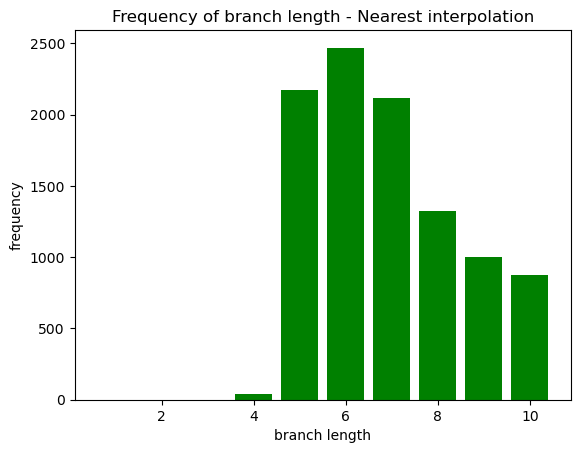

In [8]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 1, 43, 2171, 2469, 2117, 1326, 1000, 873]

plt.bar(num_branches, length, color = "g")

# Add title and labels
plt.title('Frequency of branch length - Nearest interpolation')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 178175
perc of occurences where mass is not preserved = 35.77% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 96931
perc of occurences where mass is not preserved = 19.46% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 7680
perc of occurences where mass is not preserved = 1.54% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 545
perc of occurences where mass is not preserved = 0.11% vs. 0.32% in training data







DISTANCE:
total distance progentors = 293020 
number of occurences where distance increase (not preserved) = 143067
perc of occurences where mass increase (not preserved) = 48.82% vs. 49.67% in training data


total branches where the last halo distance to main

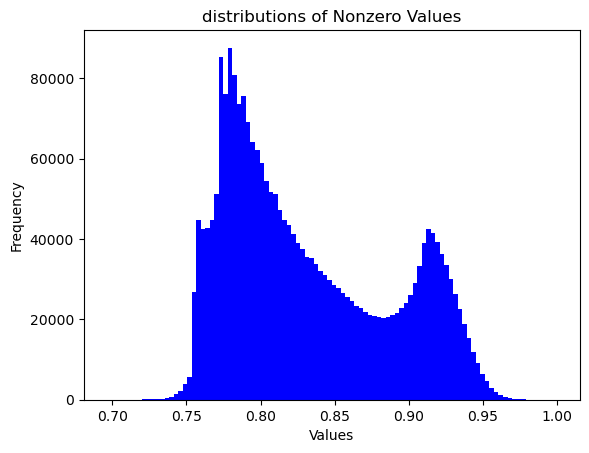

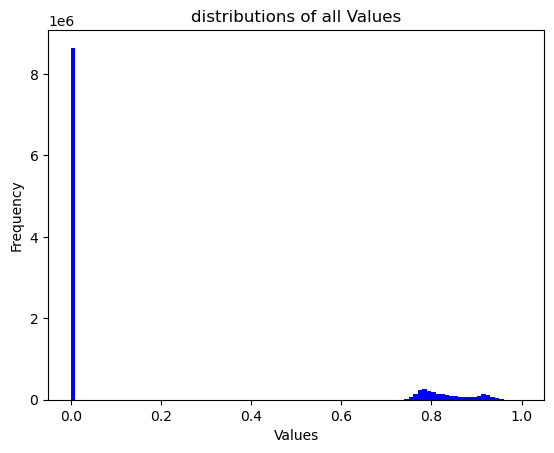

number of nonzero values = 2475374
Generated images:


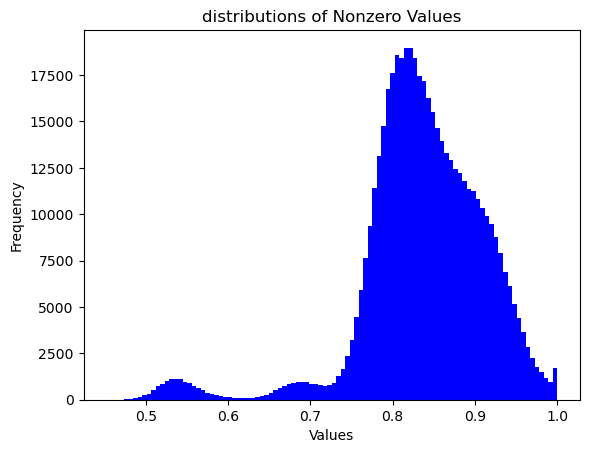

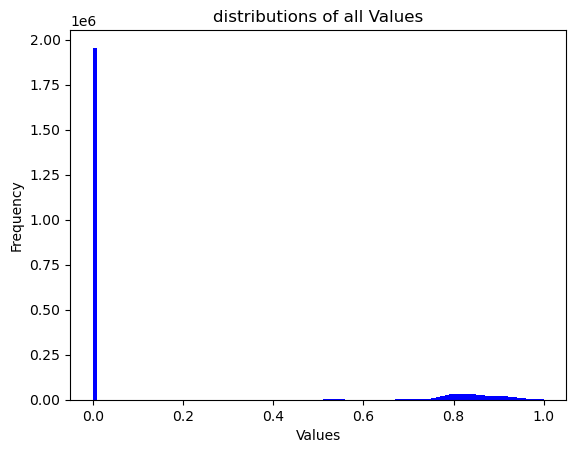

number of nonzero values = 503877


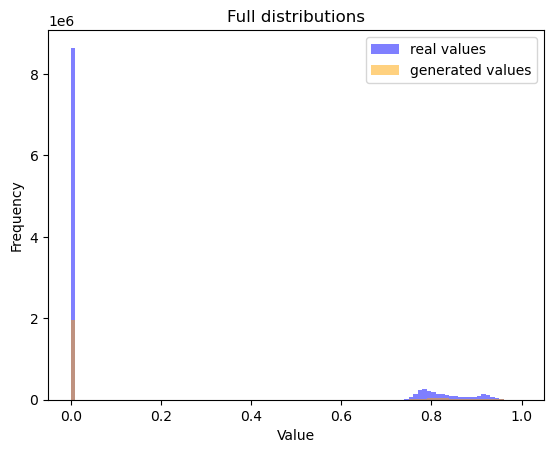

Full distribution:
KS Statistic: 0.030334529218044914
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0010:
The distributions are significantly different (reject H0), KS statistic 0.0303 > 0.0010


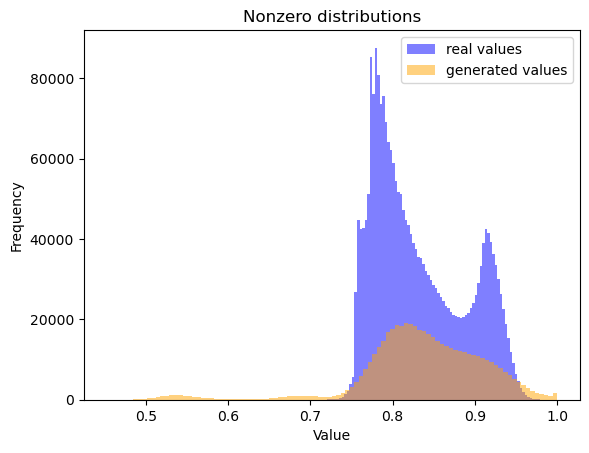

Nonzero distribution:
KS Statistic: 0.14208341315947198
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0021:
The distributions are significantly different (reject H0), KS statistic 0.1421 > 0.0021


(0.030334529218044914, 0.14208341315947198)

In [9]:
variable_consistancy_check(nearest_con, False)
avg_branch = check_branch_length(nearest_con)
nearest_con, nearest_incon = check_consistency(nearest_con)
ks_test(original, nearest_con, dim = 1)

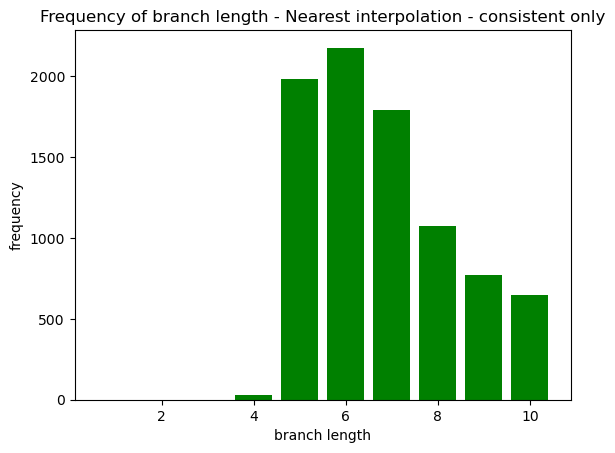

In [34]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 30, 1987, 2178, 1794, 1073, 773, 647]

plt.bar(num_branches, length, color = "g")

# Add title and labels
plt.title('Frequency of branch length - Nearest interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# interpolation = NEAREST EXACT

/Users/corneliusbencsik/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 260481
perc of occurences where mass is not preserved = 37.89% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 144955
perc of occurences where mass is not preserved = 21.08% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 11917
perc of occurences where mass is not preserved = 1.73% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 1241
perc of occurences where mass is not preserved = 0.18% vs. 0.32% in training data







DISTANCE:
total distance progentors = 445657 
number of occurences where distance increase (not preserved) = 217382
perc of occurences where mass increase (not preserved) = 48.78% vs. 49.67% in training data


total branches where the last halo distance to m

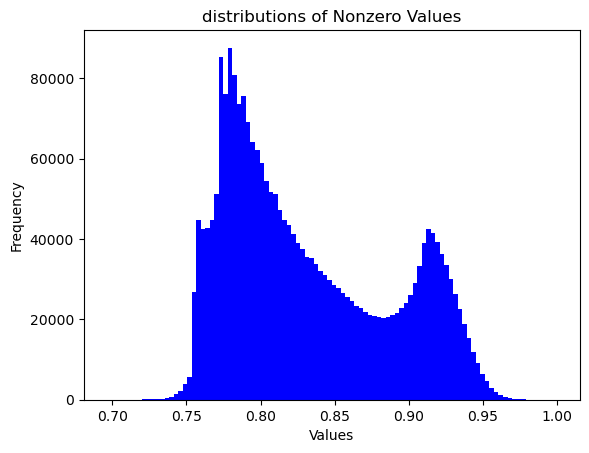

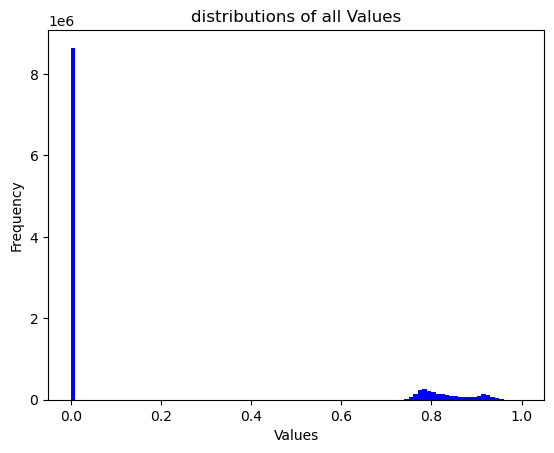

number of nonzero values = 2475374
Generated images:


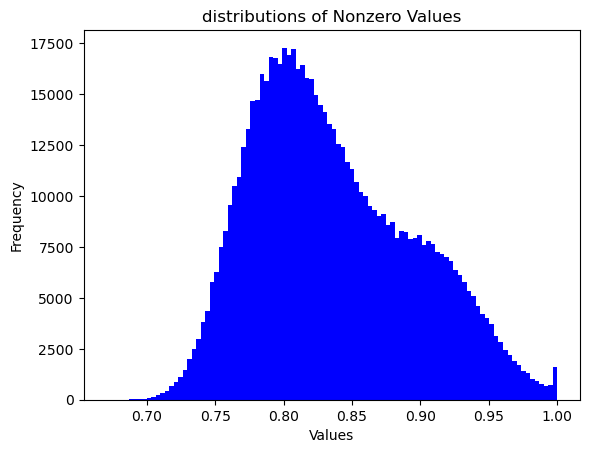

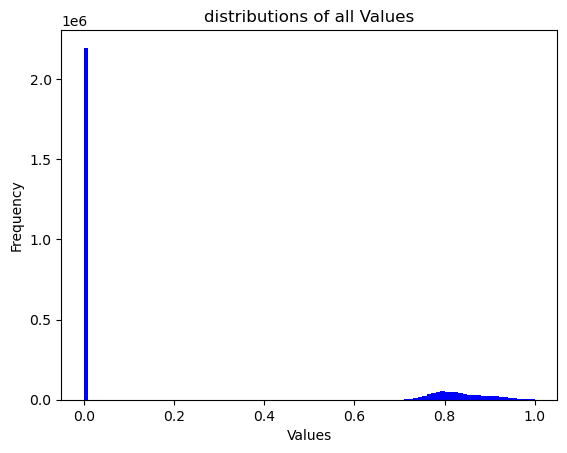

number of nonzero values = 703755


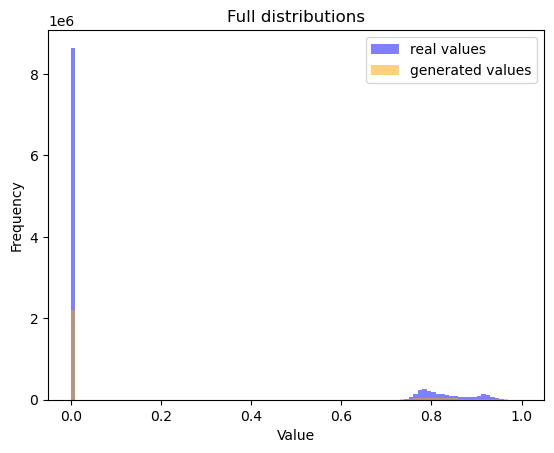

Full distribution:
KS Statistic: 0.02940660330260436
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0294 > 0.0009


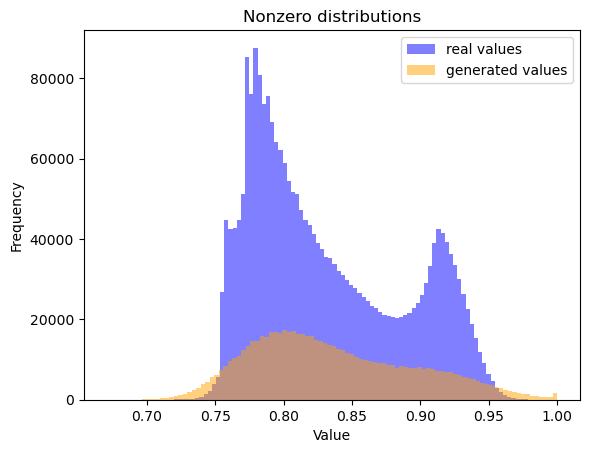

Nonzero distribution:
KS Statistic: 0.07083071208912478
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0018:
The distributions are significantly different (reject H0), KS statistic 0.0708 > 0.0018


(0.02940660330260436, 0.07083071208912478)

In [6]:
nearest_exact = torch.load("../testing/interpolation/generated_image_NEAREST_EXACT_T=1000_linear.pt", map_location = "cpu")
nearest_exact = transform(nearest_exact.to(dtype=torch.float))
nearest_exact = normalize(nearest_exact, True, [0, 1, 2])
nearest_exact = transform_diffusion_image(nearest_exact, d_thresh = 0.3, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)
variable_consistancy_check(nearest_exact, False)
avg_branch = check_branch_length(nearest_exact)
nearest_exact_con, nearest_exact_incon = check_consistency(nearest_exact)
ks_test(original, nearest_exact, dim = 1)

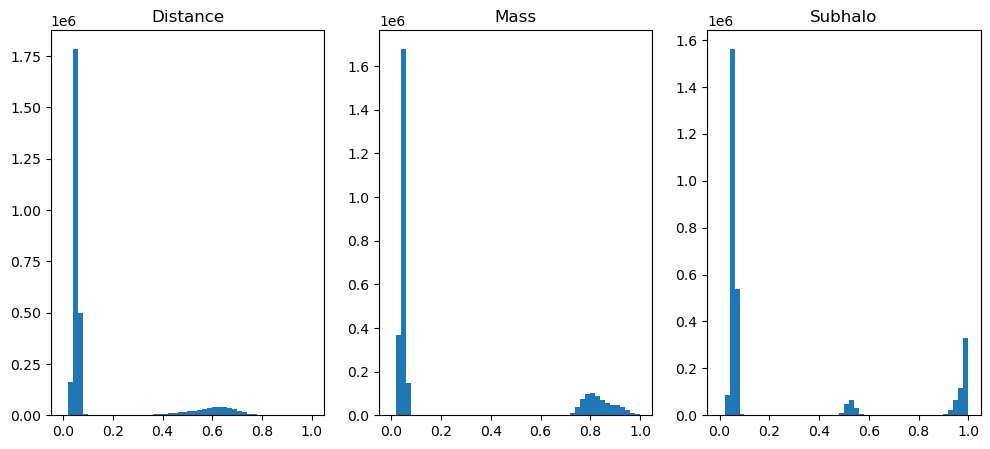

In [10]:
nearest_exact = torch.load("../testing/interpolation/generated_image_NEAREST_EXACT_T=1000_linear.pt", map_location = "cpu")
nearest_exact = transform(nearest_exact.to(dtype=torch.float))
nearest_exact = normalize(nearest_exact, True, [0, 1, 2])

dist = nearest_exact[:, 0]
mass = nearest_exact[:, 1]
subh = nearest_exact[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [11]:
# dist
print("dist:")
lower_threshold = 0.1
upper_threshold = 0.21
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.09
upper_threshold = 0.69
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.10
upper_threshold = 0.47
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.60
upper_threshold = 0.89
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.1 and 0.21: 0.00%

mass:
Percentage of values between 0.09 and 0.69: 0.00%

subh:
Percentage of values between 0.1 and 0.47: 0.00%

Percentage of values between 0.6 and 0.89: 0.00%



In [12]:
nearest_exact = torch.load("../testing/interpolation/generated_image_NEAREST_EXACT_T=1000_linear.pt", map_location = "cpu")
nearest_exact = transform(nearest_exact.to(dtype=torch.float))
nearest_exact = normalize(nearest_exact, True, [0, 1, 2])
nearest_exact = transform_diffusion_image(nearest_exact, d_thresh = 0.18, m_tresh = 0.6, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = nearest_exact[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 0.01%



MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 260481
perc of occurences where mass is not preserved = 37.89% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 144955
perc of occurences where mass is not preserved = 21.08% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 11917
perc of occurences where mass is not preserved = 1.73% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 1241
perc of occurences where mass is not preserved = 0.18% vs. 0.32% in training data







DISTANCE:
total distance progentors = 447563 
number of occurences where distance increase (not preserved) = 218568
perc of occurences where mass increase (not preserved) = 48.84% vs. 49.67% in training data


total branches where the last halo distance to m

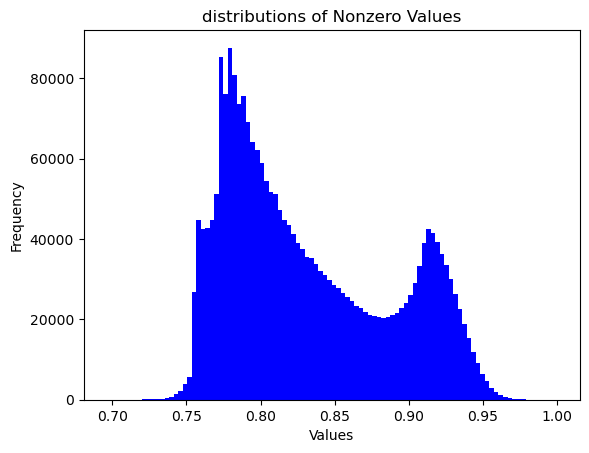

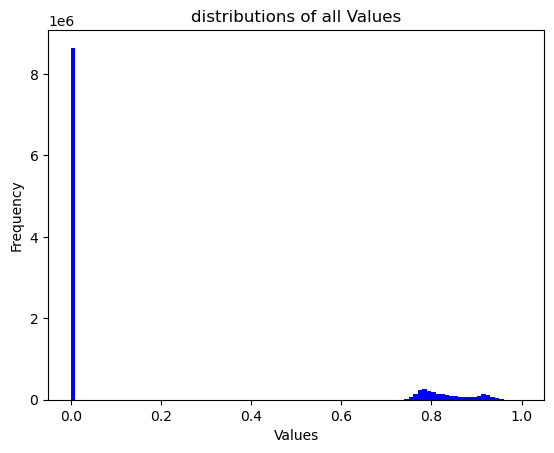

number of nonzero values = 2475374
Generated images:


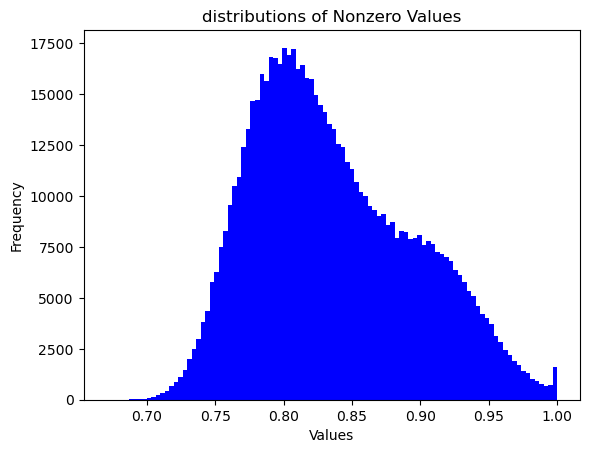

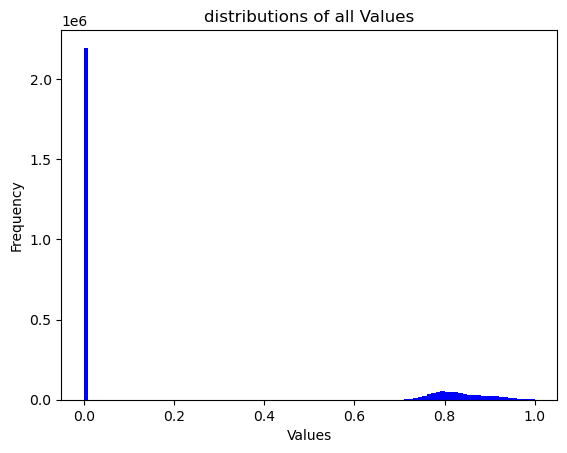

number of nonzero values = 703755


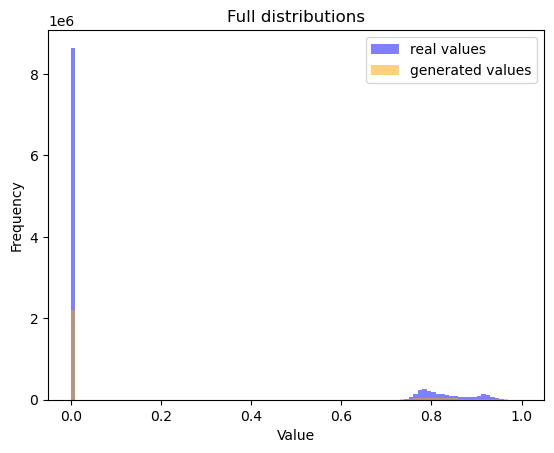

Full distribution:
KS Statistic: 0.02940660330260436
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0294 > 0.0009


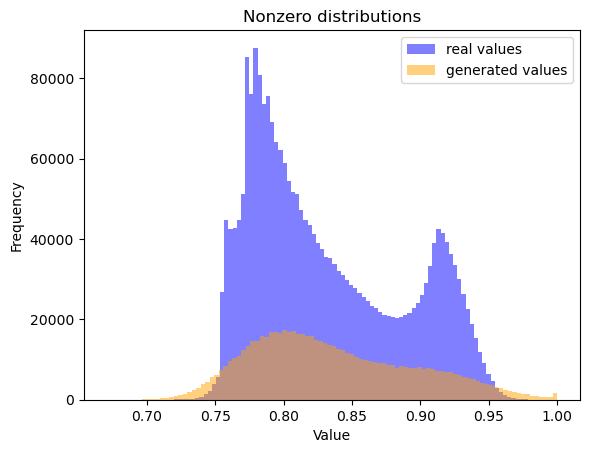

Nonzero distribution:
KS Statistic: 0.07083071208912478
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0018:
The distributions are significantly different (reject H0), KS statistic 0.0708 > 0.0018


(0.02940660330260436, 0.07083071208912478)

In [13]:
variable_consistancy_check(nearest_exact, False)
avg_branch = check_branch_length(nearest_exact)
nearest_exact_con, nearest_exact_incon = check_consistency(nearest_exact)
ks_test(original, nearest_exact, dim = 1)

In [14]:
torch.save(nearest_exact_con, "../testing/interpolation/nearest_exact_consistent.pt")

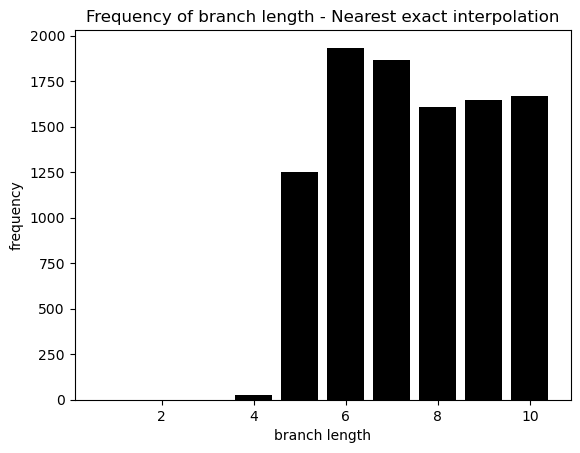

In [15]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 24, 1251, 1934, 1867, 1610, 1649, 1666]

plt.bar(num_branches, length, color = "black")

# Add title and labels
plt.title('Frequency of branch length - Nearest exact interpolation')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 231534
perc of occurences where mass is not preserved = 37.89% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 128618
perc of occurences where mass is not preserved = 21.05% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 10417
perc of occurences where mass is not preserved = 1.70% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 1092
perc of occurences where mass is not preserved = 0.18% vs. 0.32% in training data







DISTANCE:
total distance progentors = 397766 
number of occurences where distance increase (not preserved) = 194236
perc of occurences where mass increase (not preserved) = 48.83% vs. 49.67% in training data


total branches where the last halo distance to m

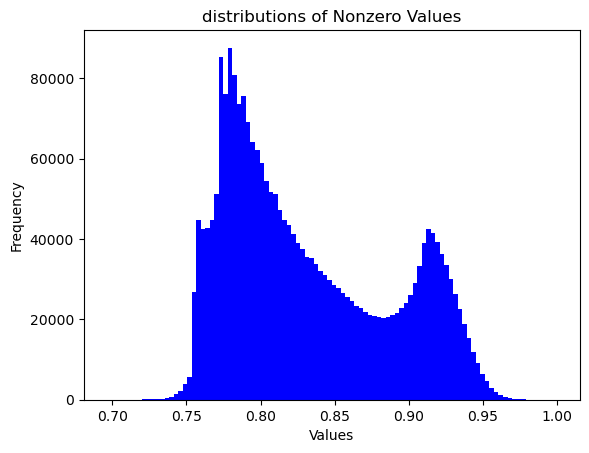

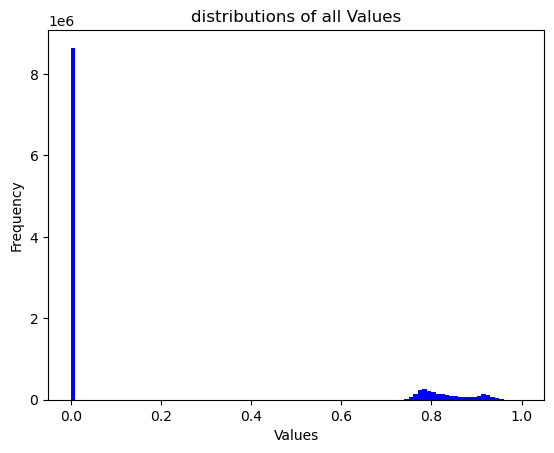

number of nonzero values = 2475374
Generated images:


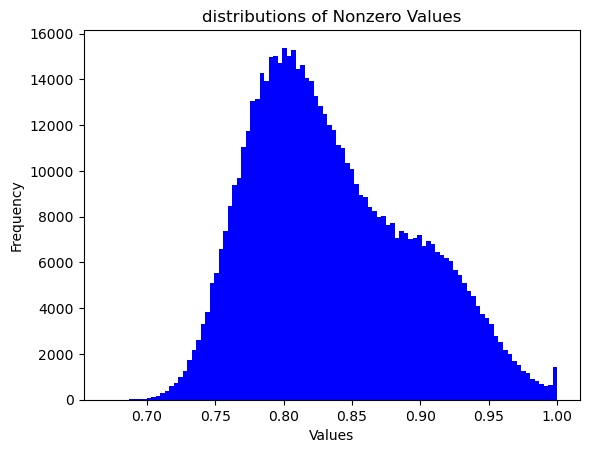

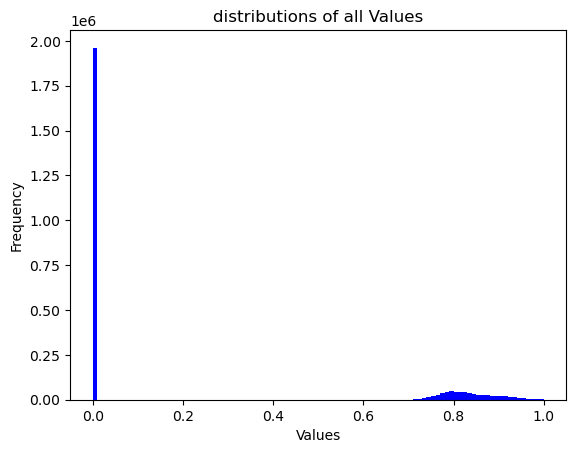

number of nonzero values = 624569


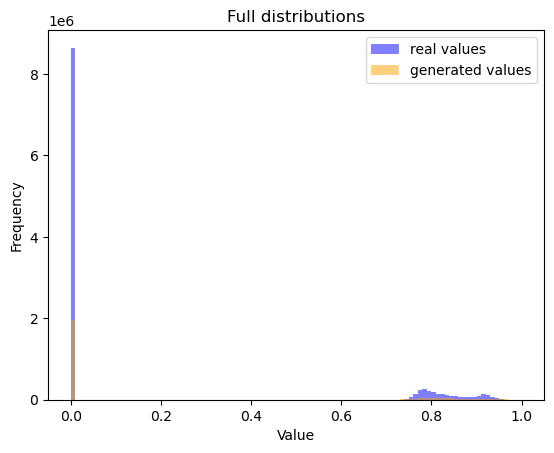

Full distribution:
KS Statistic: 0.028527586442047115
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0285 > 0.0009


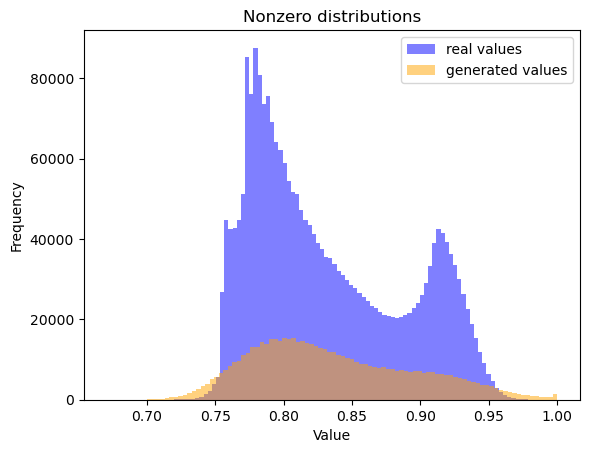

Nonzero distribution:
KS Statistic: 0.07059139313558377
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.0706 > 0.0019


(0.028527586442047115, 0.07059139313558377)

In [16]:
variable_consistancy_check(nearest_exact_con, False)
avg_branch = check_branch_length(nearest_exact_con)
nearest_con, nearest_incon = check_consistency(nearest_exact_con)
ks_test(original, nearest_exact_con, dim = 1)

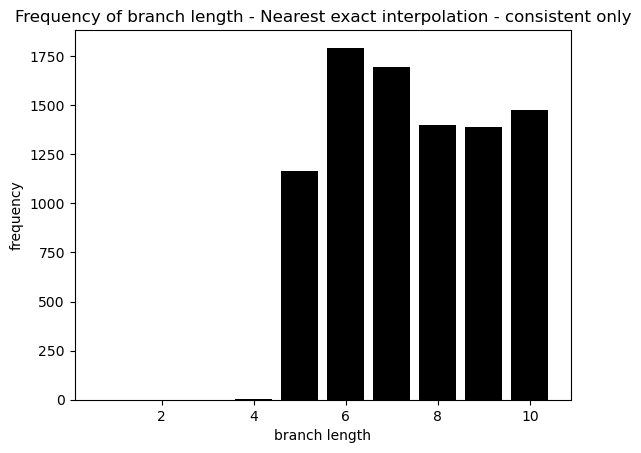

In [42]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 4, 1164, 1793, 1693, 1399, 1390, 1476]

plt.bar(num_branches, length, color = "black")

# Add title and labels
plt.title('Frequency of branch length - Nearest exact interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# interpolation = BILINEAR


Real images:


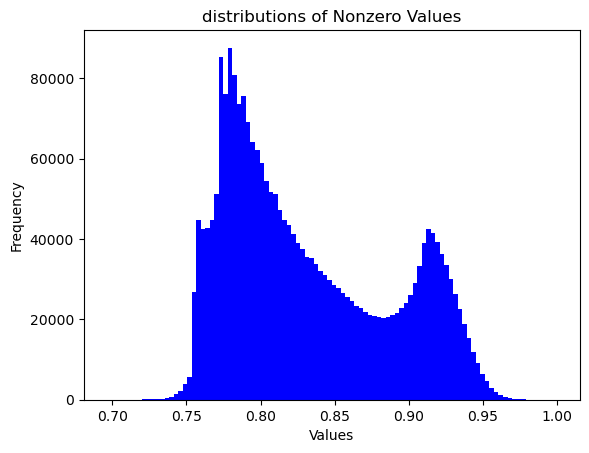

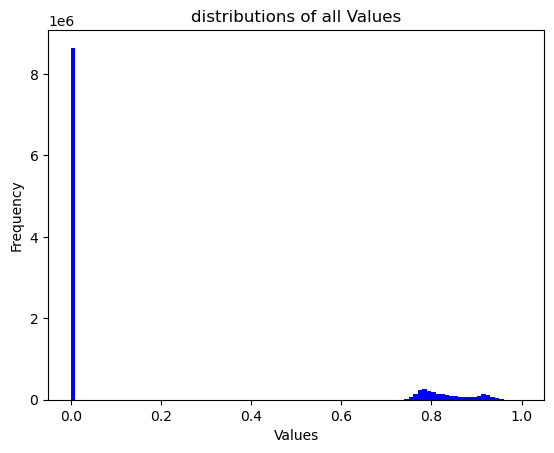

number of nonzero values = 2475374
Generated images:


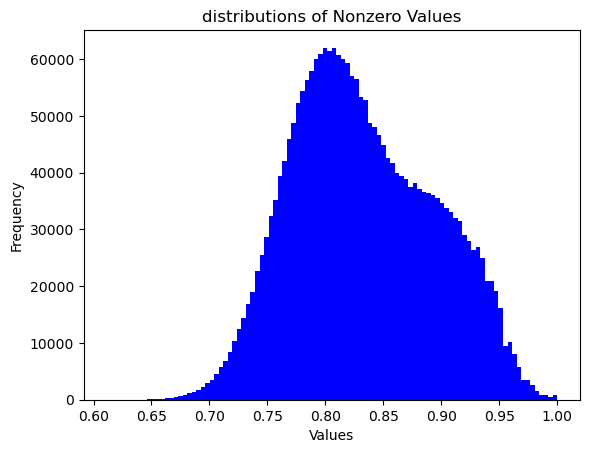

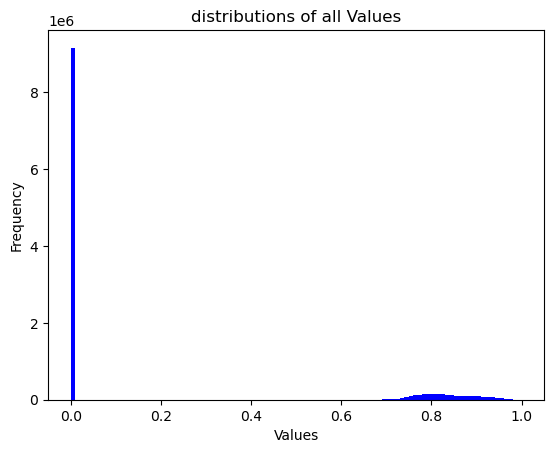

number of nonzero values = 2435864


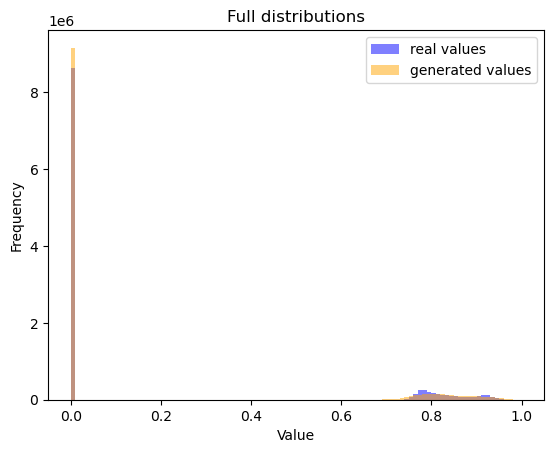

Full distribution:
KS Statistic: 0.030391888656693955
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.0304 > 0.0006


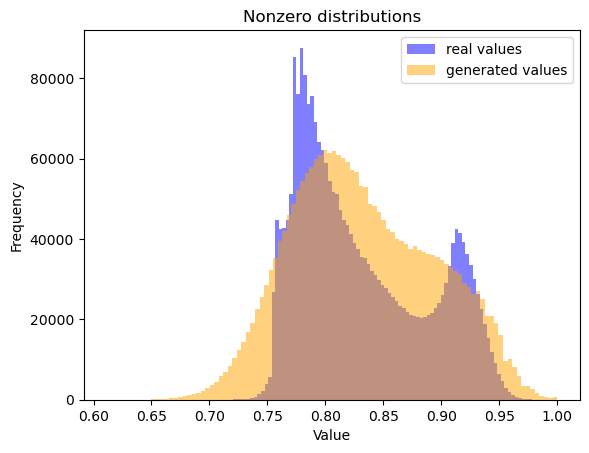

Nonzero distribution:
KS Statistic: 0.08517057622633809
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0012:
The distributions are significantly different (reject H0), KS statistic 0.0852 > 0.0012


(0.030391888656693955, 0.08517057622633809)

In [5]:
bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])
bicubic1 = transform_diffusion_image(bicubic, d_thresh = 0.3, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)
bicubic2 = transform_diffusion_image(bicubic, d_thresh = 0.3, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)
bicubic3 = transform_diffusion_image(bicubic, d_thresh = 0.3, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)
bicubic4 = transform_diffusion_image(bicubic, d_thresh = 0.3, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)

data = torch.cat([bicubic1, bicubic2, bicubic3, bicubic4])
ks_test(original, data, dim = 1)

MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 268118
perc of occurences where mass is not preserved = 39.56% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 167563
perc of occurences where mass is not preserved = 24.72% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 41303
perc of occurences where mass is not preserved = 6.09% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 15998
perc of occurences where mass is not preserved = 2.36% vs. 0.32% in training data







DISTANCE:
total distance progentors = 435184 
number of occurences where distance increase (not preserved) = 222228
perc of occurences where mass increase (not preserved) = 51.07% vs. 49.67% in training data


total branches where the last halo distance to 

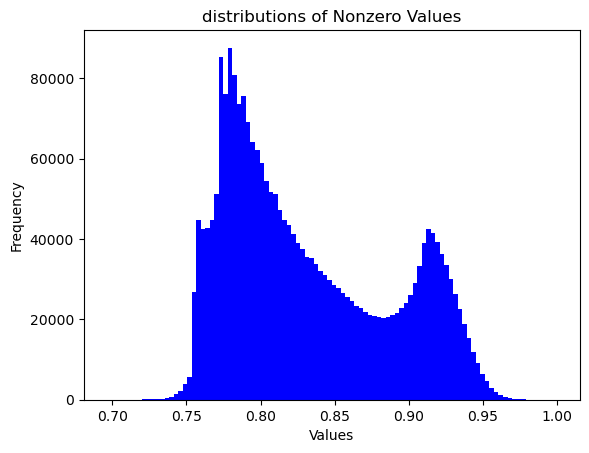

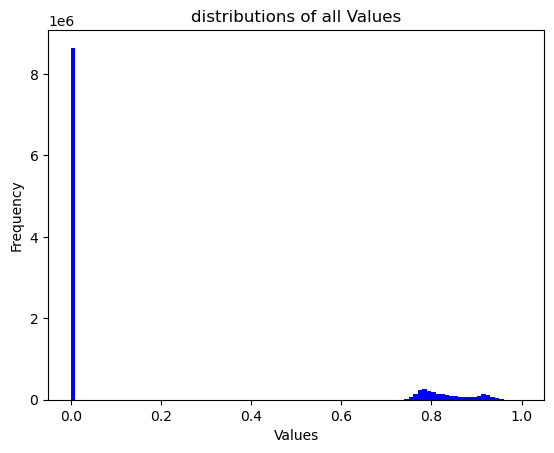

number of nonzero values = 2475374
Generated images:


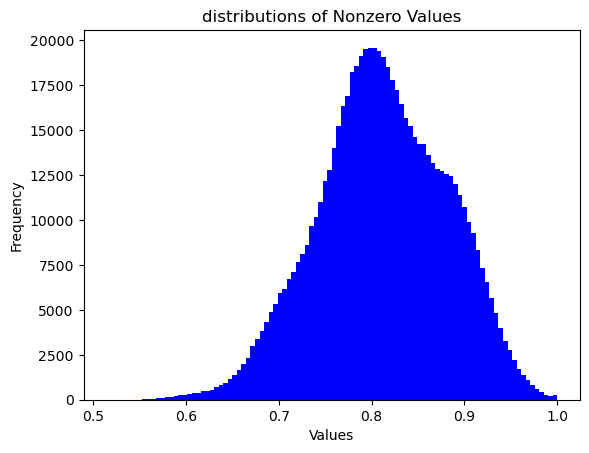

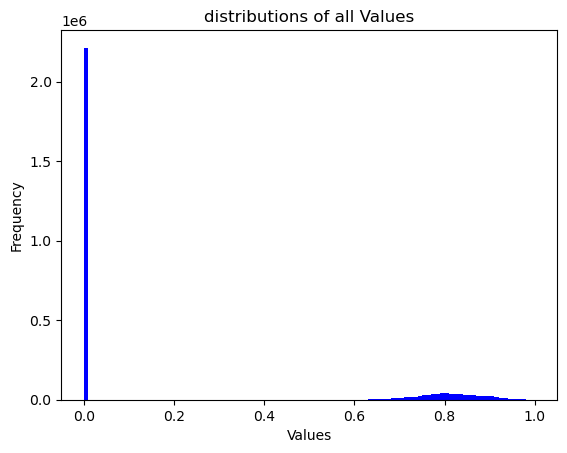

number of nonzero values = 687695


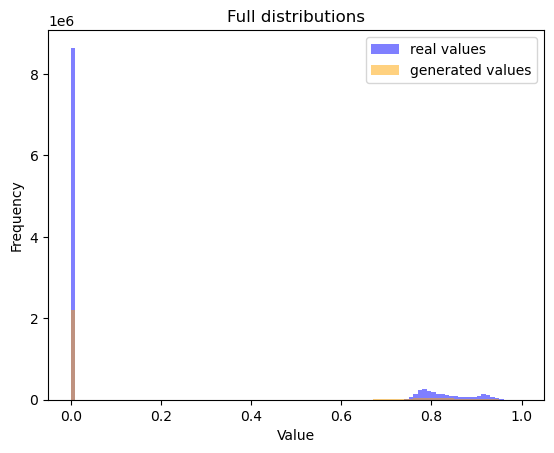

Full distribution:
KS Statistic: 0.03216016451876291
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0322 > 0.0009


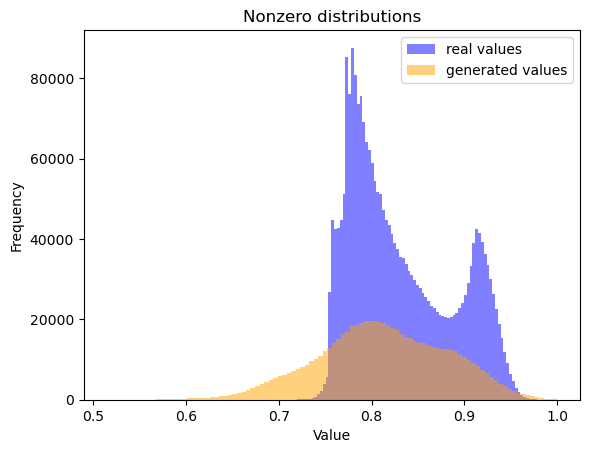

Nonzero distribution:
KS Statistic: 0.196524949127827
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.1965 > 0.0019


(0.03216016451876291, 0.196524949127827)

In [17]:
bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])
bilinear = transform_diffusion_image(bilinear, d_thresh = 0.3, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)
variable_consistancy_check(bilinear, False)
avg_branch = check_branch_length(bilinear)
bilinear_con, bilinear_incon = check_consistency(bilinear)
ks_test(original, bilinear, dim = 1)

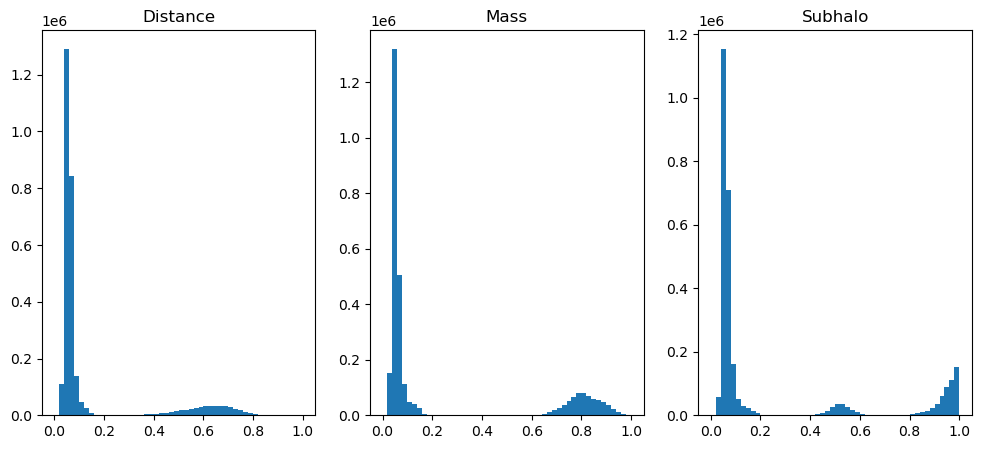

In [18]:
bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])

dist = bilinear[:, 0]
mass = bilinear[:, 1]
subh = bilinear[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()



In [19]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.5
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.25
upper_threshold = 0.35
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.7
upper_threshold = 0.73
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.3: 0.06%

mass:
Percentage of values between 0.2 and 0.5: 0.00%

subh:
Percentage of values between 0.25 and 0.35: 0.00%

Percentage of values between 0.7 and 0.73: 0.00%



In [20]:
bilinear = torch.load("../testing/interpolation/generated_image_BILINEAR_T=1000_linear.pt", map_location = "cpu")
bilinear = transform(bilinear.to(dtype=torch.float))
bilinear = normalize(bilinear, True, [0, 1, 2])
bilinear = transform_diffusion_image(bilinear, d_thresh = 0.25, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)

original_min = 0.6985
mass = bilinear[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

mass:
Percentage of values below 0.6985: 1.35%



MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 268118
perc of occurences where mass is not preserved = 39.56% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 167563
perc of occurences where mass is not preserved = 24.72% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 41303
perc of occurences where mass is not preserved = 6.09% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 15998
perc of occurences where mass is not preserved = 2.36% vs. 0.32% in training data







DISTANCE:
total distance progentors = 436544 
number of occurences where distance increase (not preserved) = 222958
perc of occurences where mass increase (not preserved) = 51.07% vs. 49.67% in training data


total branches where the last halo distance to 

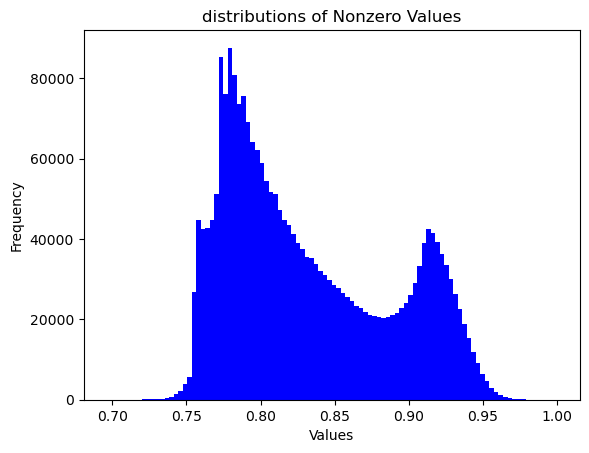

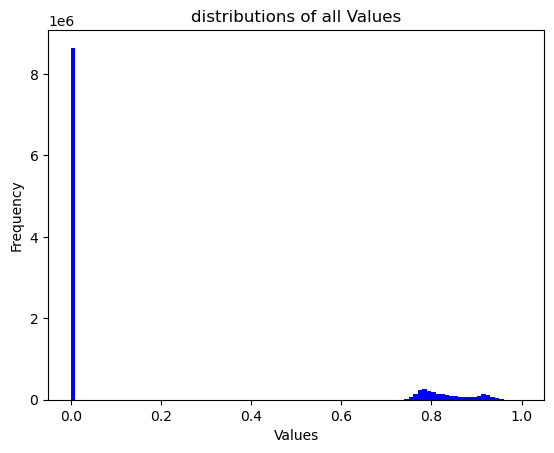

number of nonzero values = 2475374
Generated images:


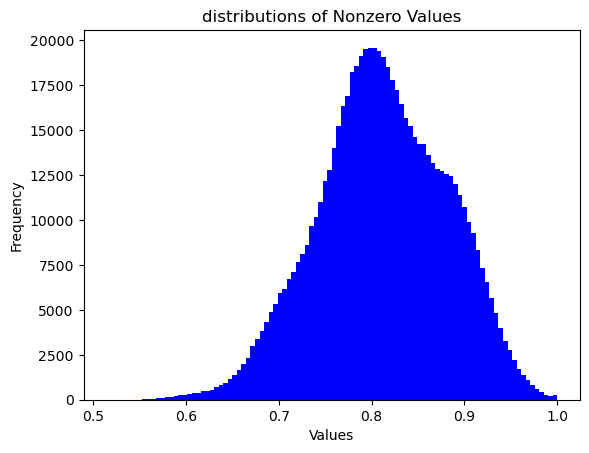

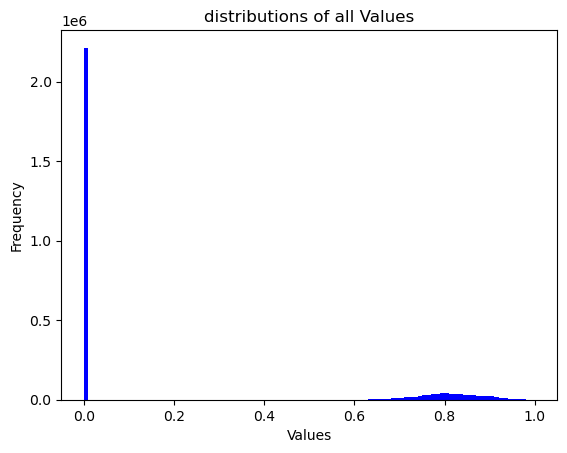

number of nonzero values = 687695


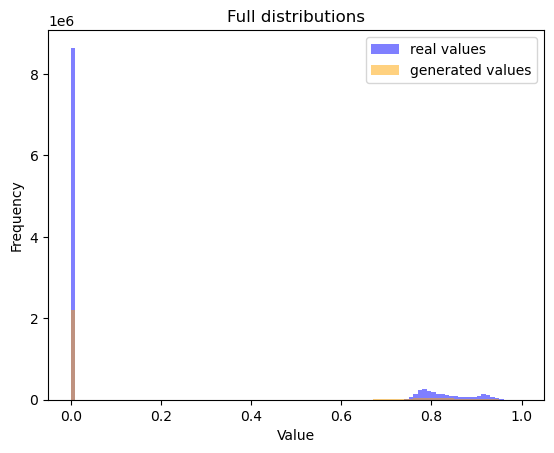

Full distribution:
KS Statistic: 0.03216016451876291
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0322 > 0.0009


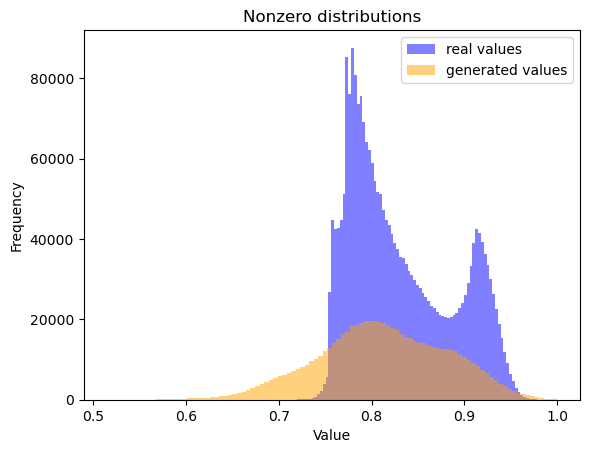

Nonzero distribution:
KS Statistic: 0.196524949127827
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.1965 > 0.0019


(0.03216016451876291, 0.196524949127827)

In [21]:
variable_consistancy_check(bilinear, False)
avg_branch = check_branch_length(bilinear)
bilinear_con, bilinear_incon = check_consistency(bilinear)
ks_test(original, bilinear, dim = 1)

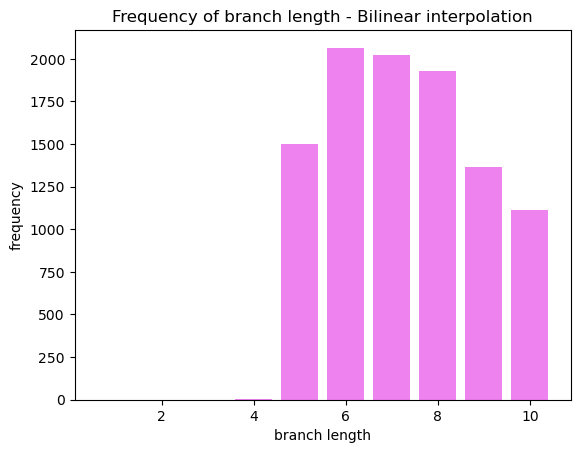

In [55]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 6, 1503, 2065, 2020, 1929, 1364, 1113]

plt.bar(num_branches, length, color = "violet")

# Add title and labels
plt.title('Frequency of branch length - Bilinear interpolation')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 250879
perc of occurences where mass is not preserved = 39.57% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 156830
perc of occurences where mass is not preserved = 24.74% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 38550
perc of occurences where mass is not preserved = 6.08% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 14940
perc of occurences where mass is not preserved = 2.36% vs. 0.32% in training data







DISTANCE:
total distance progentors = 408235 
number of occurences where distance increase (not preserved) = 208529
perc of occurences where mass increase (not preserved) = 51.08% vs. 49.67% in training data


total branches where the last halo distance to 

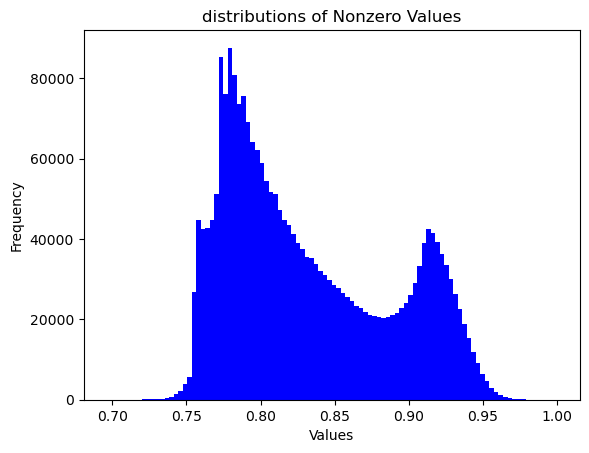

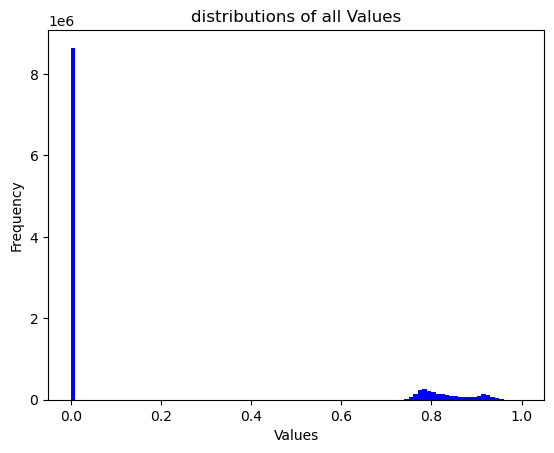

number of nonzero values = 2475374
Generated images:


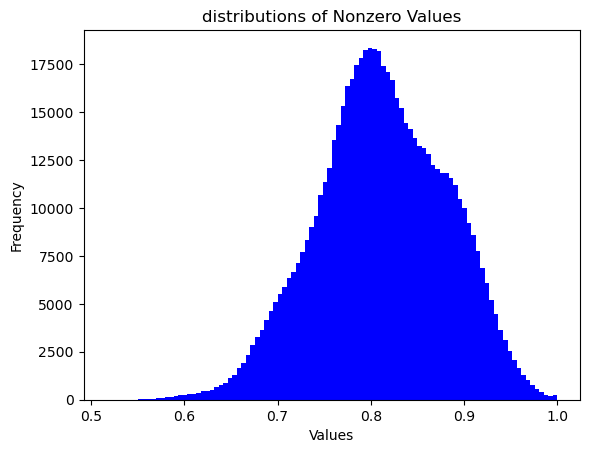

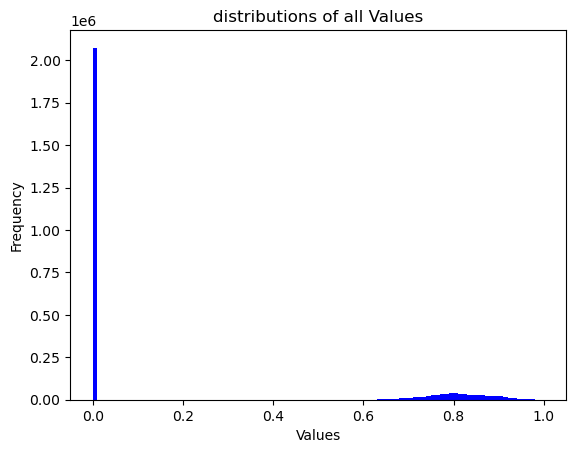

number of nonzero values = 642926


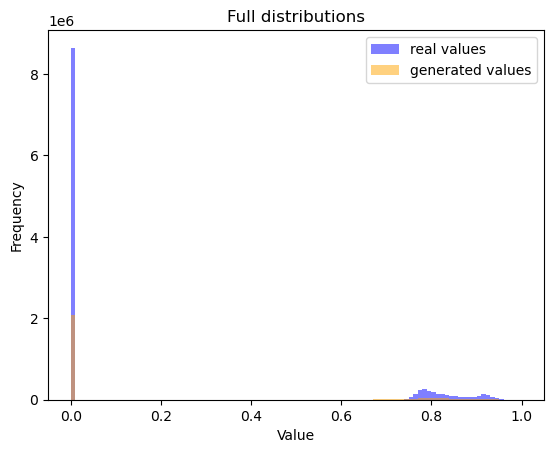

Full distribution:
KS Statistic: 0.03239324809437105
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0324 > 0.0009


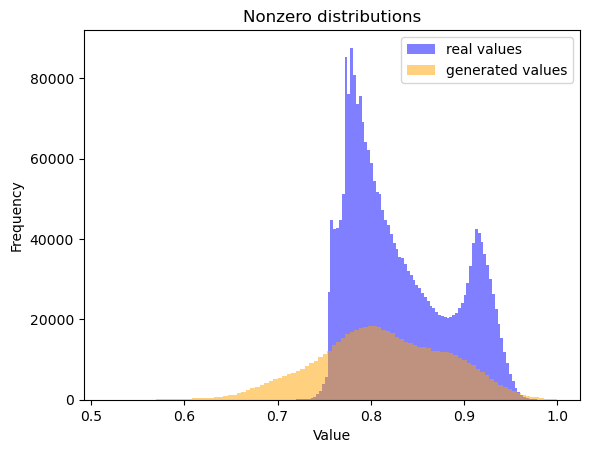

Nonzero distribution:
KS Statistic: 0.19572157892909012
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.1957 > 0.0019


(0.03239324809437105, 0.19572157892909012)

In [23]:
variable_consistancy_check(bilinear_con, False)
avg_branch = check_branch_length(bilinear_con)
nearest_con, nearest_incon = check_consistency(bilinear_con)
ks_test(original, bilinear_con, dim = 1)

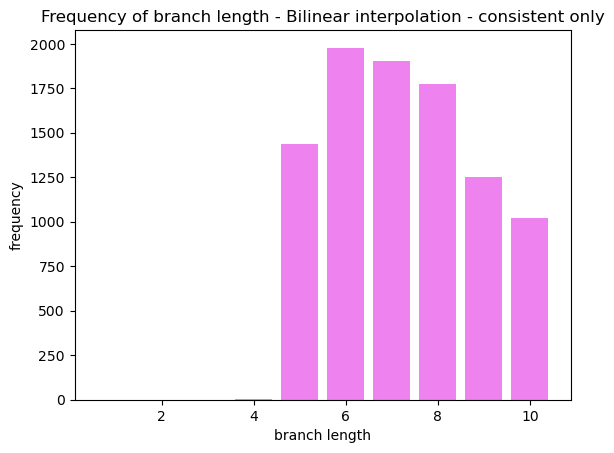

In [41]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 3, 1439, 1978, 1903, 1773, 1251, 1023]

plt.bar(num_branches, length, color = "violet")

# Add title and labels
plt.title('Frequency of branch length - Bilinear interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# interpolation = BICUBIC


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 214236
perc of occurences where mass is not preserved = 35.69% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 122083
perc of occurences where mass is not preserved = 20.34% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 23123
perc of occurences where mass is not preserved = 3.85% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 2636
perc of occurences where mass is not preserved = 0.44% vs. 0.32% in training data







DISTANCE:
total distance progentors = 359901 
number of occurences where distance increase (not preserved) = 179081
perc of occurences where mass increase (not preserved) = 49.76% vs. 49.67% in training data


total branches where the last halo distance to m

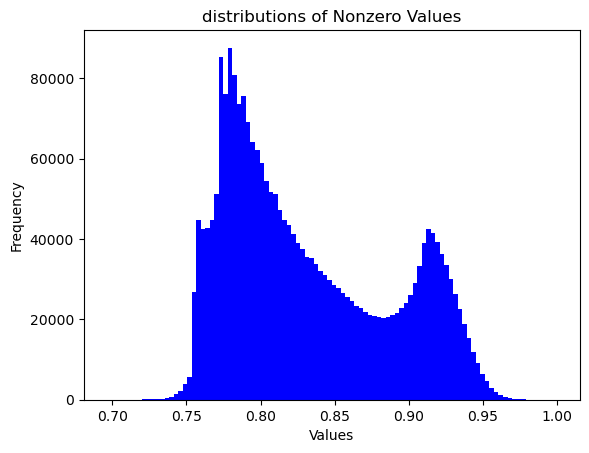

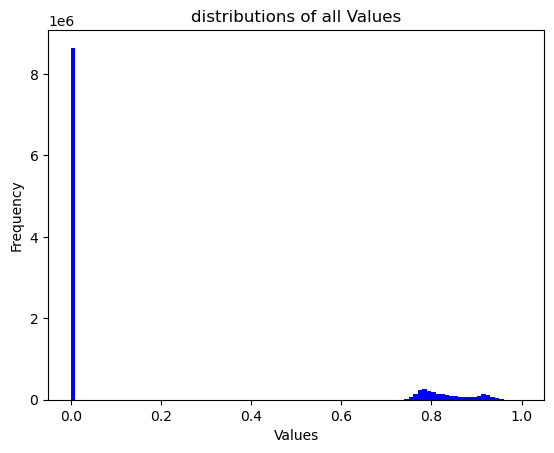

number of nonzero values = 2475374
Generated images:


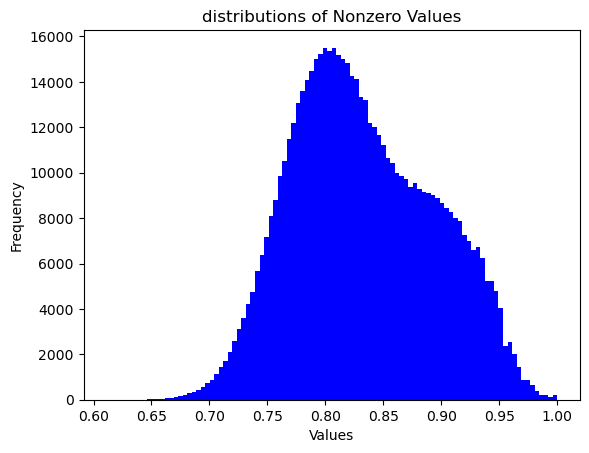

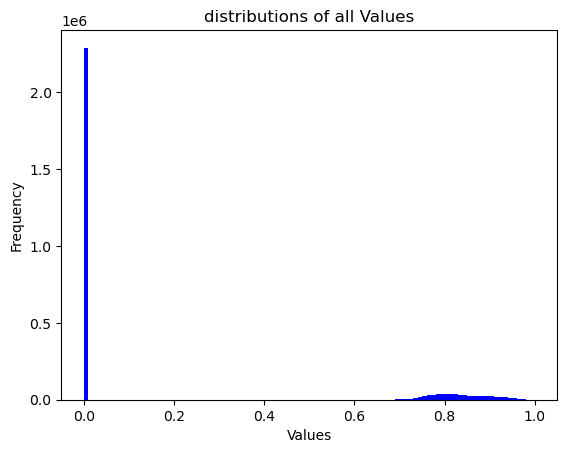

number of nonzero values = 608966


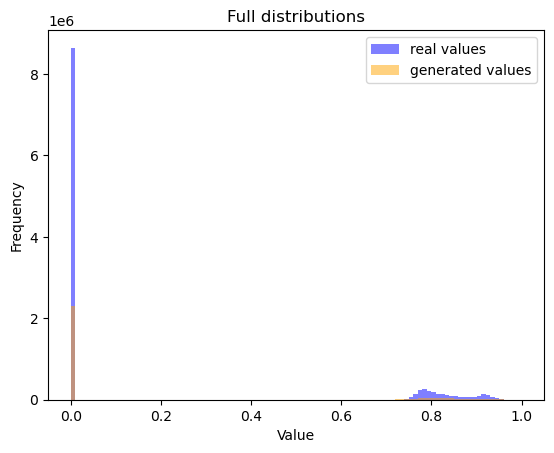

Full distribution:
KS Statistic: 0.030391888656693955
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0304 > 0.0009


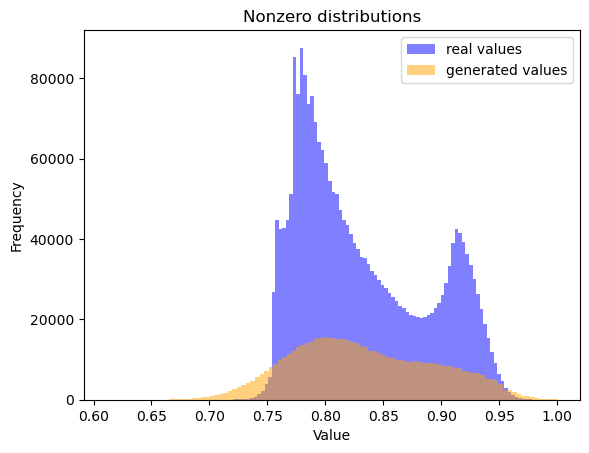

Nonzero distribution:
KS Statistic: 0.08517057622633809
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.0852 > 0.0019


(0.030391888656693955, 0.08517057622633809)

In [24]:
bicubic = torch.load("../testing/interpolation/generated_image_BICUBIC_T=1000_linear.pt", map_location = "cpu")
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])
bicubic = transform_diffusion_image(bicubic, d_thresh = 0.3, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)
variable_consistancy_check(bicubic, False)
avg_branch = check_branch_length(bicubic)
bicubic_con, bicubic_incon = check_consistency(bicubic)
ks_test(original, bicubic, dim = 1)

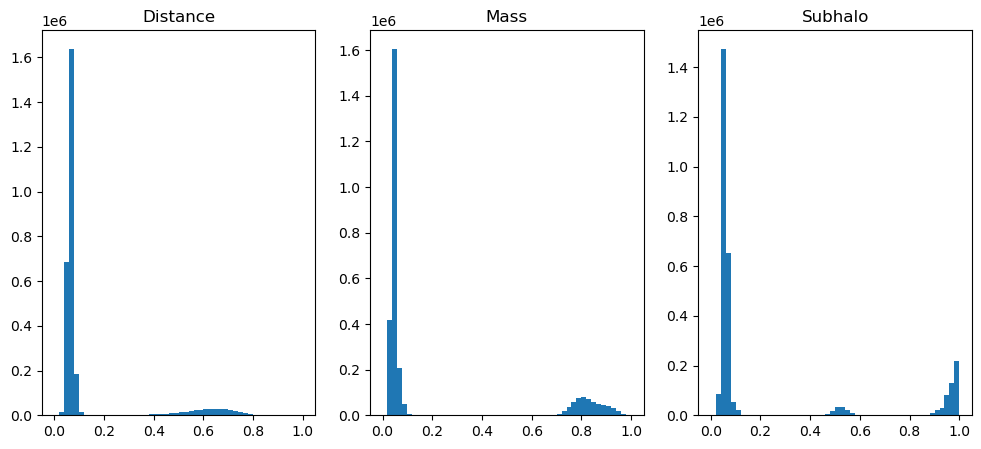

In [25]:
bicubic = torch.load("../testing/interpolation/generated_image_BICUBIC_T=1000_linear.pt", map_location = "cpu")
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])

dist = bicubic[:, 0]
mass = bicubic[:, 1]
subh = bicubic[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [26]:
# dist

print("dist:")
lower_threshold = 0.14
upper_threshold = 0.22
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.6
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.14
upper_threshold = 0.44
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.62
upper_threshold = 0.85
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.14 and 0.22: 0.00%

mass:
Percentage of values between 0.2 and 0.6: 0.00%

subh:
Percentage of values between 0.14 and 0.44: 0.00%

Percentage of values between 0.62 and 0.85: 0.00%



In [27]:
bicubic = torch.load("../testing/interpolation/generated_image_BICUBIC_T=1000_linear.pt", map_location = "cpu")
bicubic = transform(bicubic.to(dtype=torch.float))
bicubic = normalize(bicubic, True, [0, 1, 2])
bicubic = transform_diffusion_image(bicubic, d_thresh = 0.18, m_tresh = 0.5, s_low = 0.3, s_high = 0.72)

original_min = 0.6958
mass = bicubic[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")


mass:
Percentage of values below 0.6958: 0.08%



MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 214236
perc of occurences where mass is not preserved = 35.69% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 122083
perc of occurences where mass is not preserved = 20.34% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 23123
perc of occurences where mass is not preserved = 3.85% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 2636
perc of occurences where mass is not preserved = 0.44% vs. 0.32% in training data







DISTANCE:
total distance progentors = 361260 
number of occurences where distance increase (not preserved) = 179848
perc of occurences where mass increase (not preserved) = 49.78% vs. 49.67% in training data


total branches where the last halo distance to m

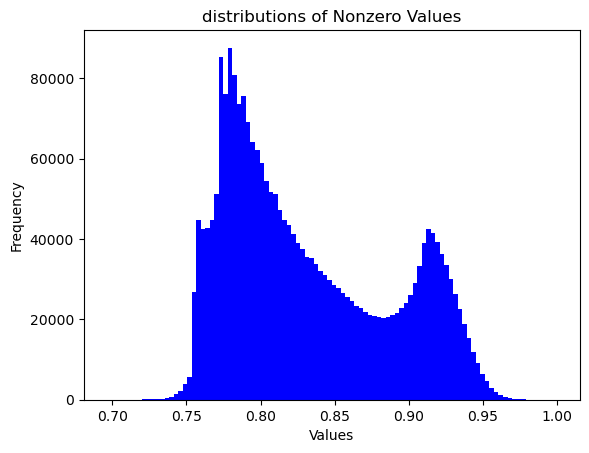

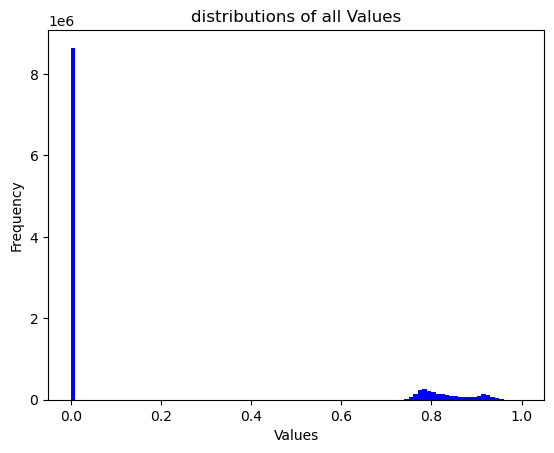

number of nonzero values = 2475374
Generated images:


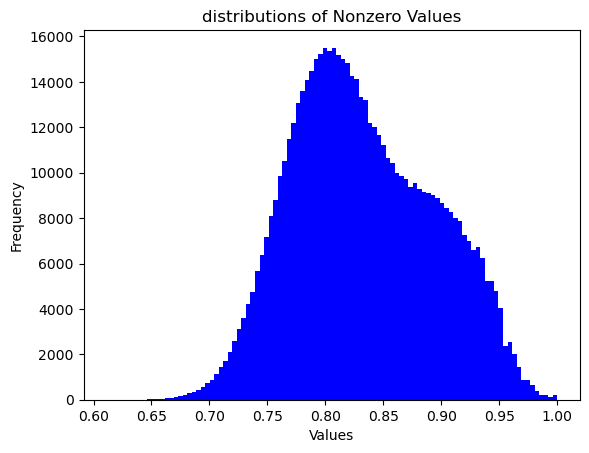

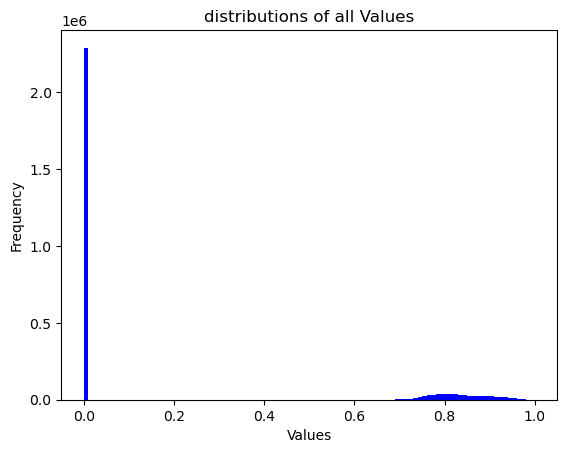

number of nonzero values = 608966


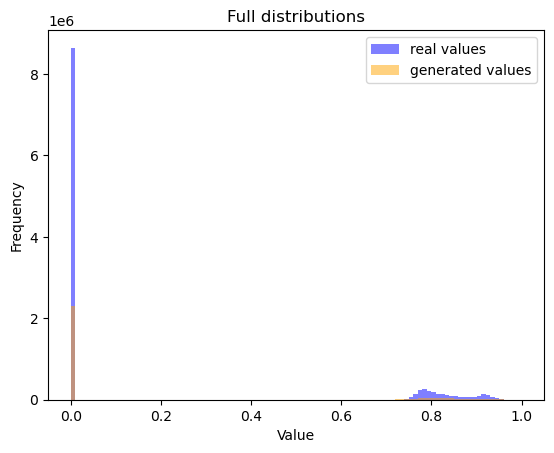

Full distribution:
KS Statistic: 0.030391888656693955
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0304 > 0.0009


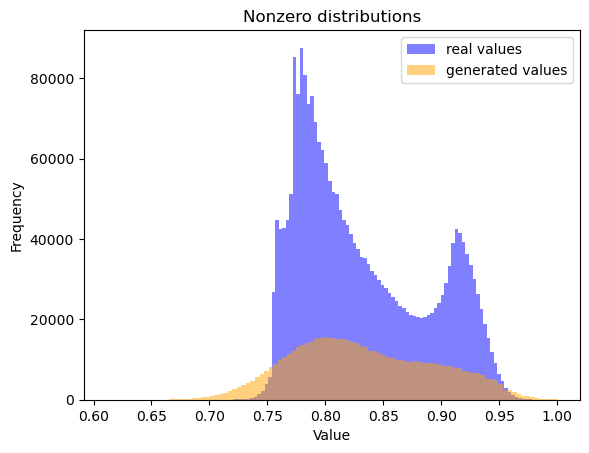

Nonzero distribution:
KS Statistic: 0.08517057622633809
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.0852 > 0.0019


(0.030391888656693955, 0.08517057622633809)

In [28]:
variable_consistancy_check(bicubic, False)
avg_branch = check_branch_length(bicubic)
bicubic_con, bicubic_incon = check_consistency(bicubic)
ks_test(original, bicubic, dim = 1)

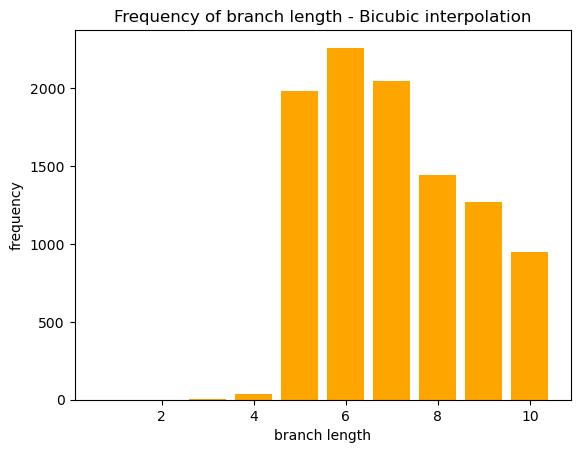

In [29]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 5, 38, 1982, 2262, 2045, 1446, 1270, 952]

plt.bar(num_branches, length, color = "orange")

# Add title and labels
plt.title('Frequency of branch length - Bicubic interpolation')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 203880
perc of occurences where mass is not preserved = 35.67% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 116126
perc of occurences where mass is not preserved = 20.32% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 21959
perc of occurences where mass is not preserved = 3.84% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 2480
perc of occurences where mass is not preserved = 0.43% vs. 0.32% in training data







DISTANCE:
total distance progentors = 343874 
number of occurences where distance increase (not preserved) = 171249
perc of occurences where mass increase (not preserved) = 49.80% vs. 49.67% in training data


total branches where the last halo distance to m

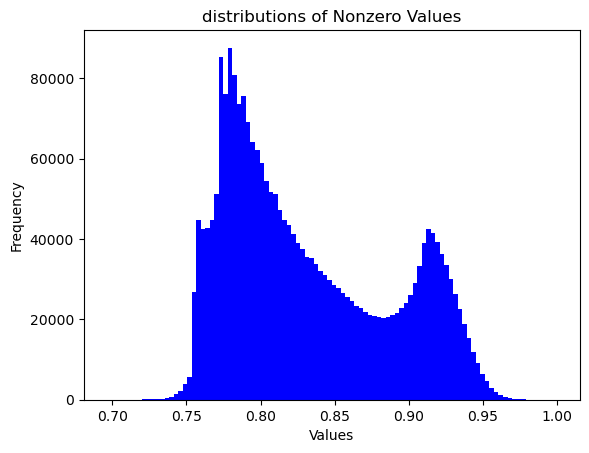

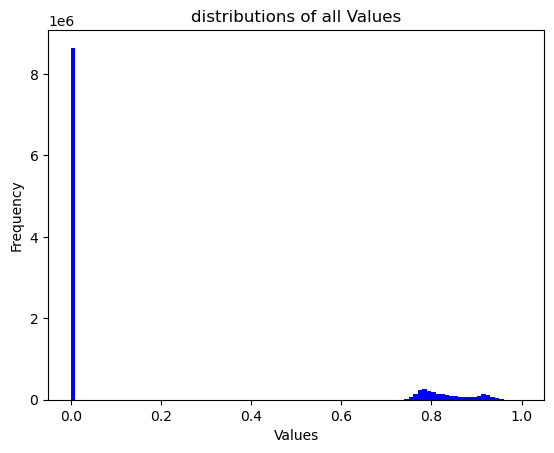

number of nonzero values = 2475374
Generated images:


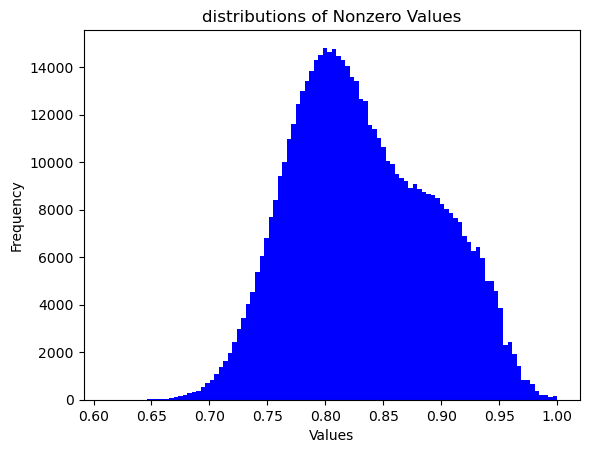

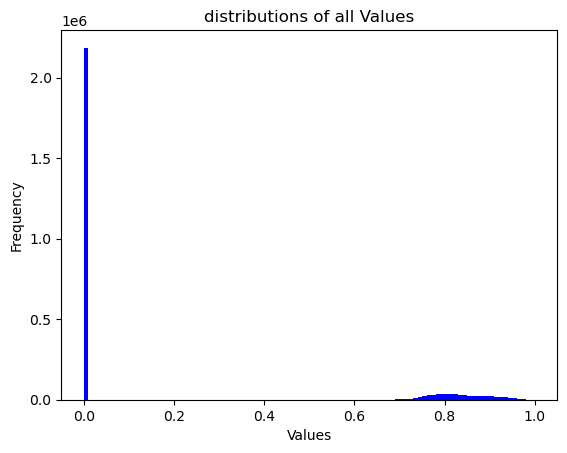

number of nonzero values = 579627


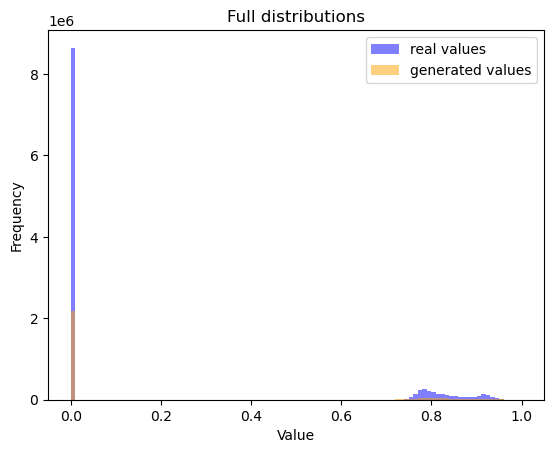

Full distribution:
KS Statistic: 0.03077553394590593
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0308 > 0.0009


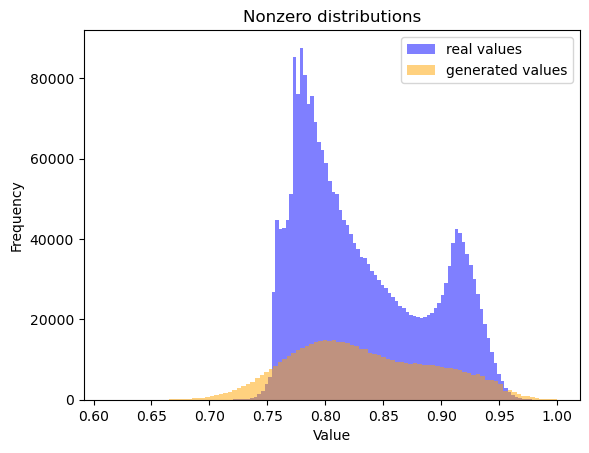

Nonzero distribution:
KS Statistic: 0.08501985159995197
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0020:
The distributions are significantly different (reject H0), KS statistic 0.0850 > 0.0020


(0.03077553394590593, 0.08501985159995197)

In [48]:
variable_consistancy_check(bicubic_con, False)
avg_branch = check_branch_length(bicubic_con)
nearest_con, nearest_incon = check_consistency(bicubic_con)
ks_test(original, bicubic_con, dim = 1)

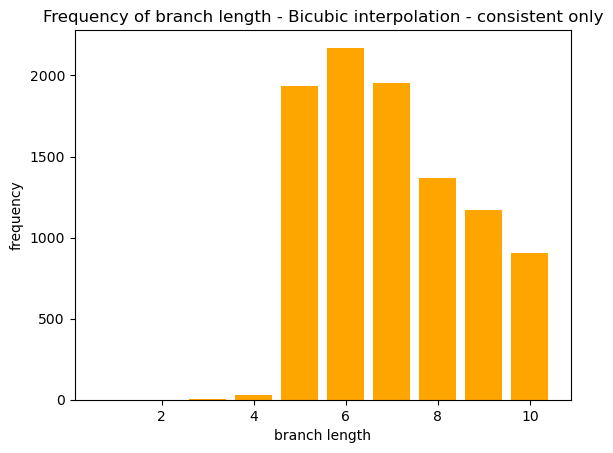

In [47]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 5, 29, 1936, 2171, 1955, 1365, 1172, 906]

plt.bar(num_branches, length, color = "orange")

# Add title and labels
plt.title('Frequency of branch length - Bicubic interpolation - consistent only')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()